In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
# Load Dataset 
salary_data = pd.read_csv("Salary.csv")
salary_data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [3]:
# Summarize the Salary dataset
salary_data.shape

(32561, 5)

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [5]:
np.unique(salary_data['income'])

array(['<=50K', '>50K'], dtype=object)

In [6]:
# Mapping salary data into binery values
income_set = set(salary_data['income'])
salary_data['income'] = salary_data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
salary_data['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [7]:
salary_data.describe()

,age,education.num,capital.gain,hours.per.week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456,0.240810
std,13.640433,2.572720,7385.292085,12.347429,0.427581
min,17.000000,1.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,99.000000,1.000000


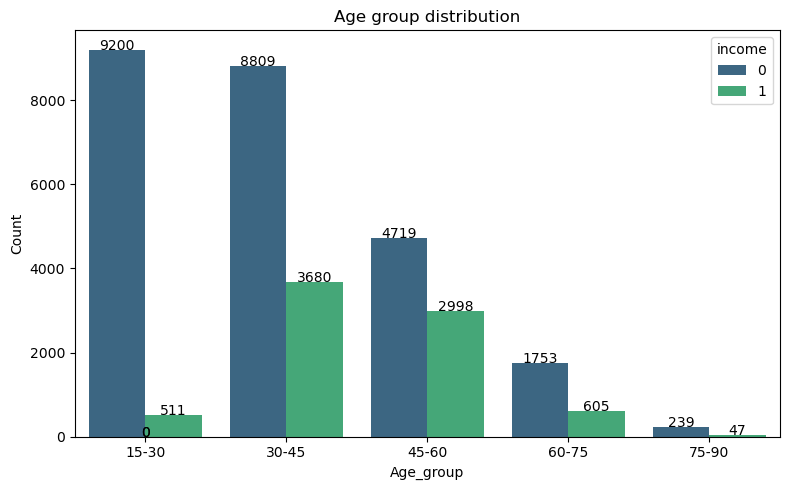

In [8]:
# Visualize the age column

# Define the bins and labels
bins = [15,30,45,60,75,91]
labels = ['15-30','30-45','45-60','60-75','75-90']

# Create a new column for age groups
salary_data['age_group'] = pd.cut(salary_data['age'], bins=bins, labels=labels, right=False)
salary_data['age_group']

# Plot the distribution
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', hue='income', data=salary_data, palette='viridis')

# Add count labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha="center"
    )

plt.title("Age group distribution")
plt.xlabel("Age_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

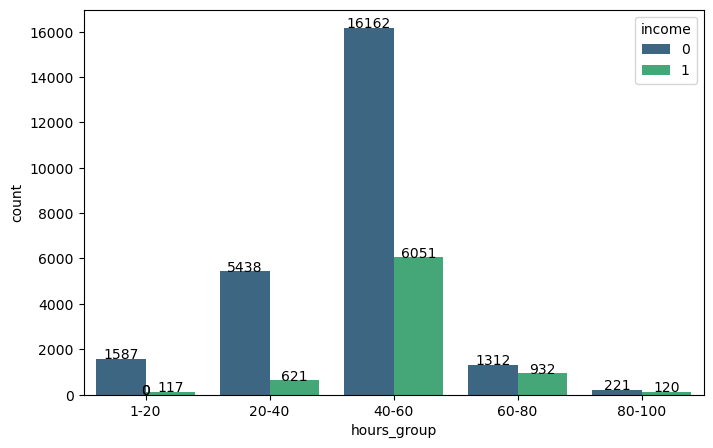

In [9]:
# visualize the column hours.per.week working in salary dataset

# Define the bins and labels
bins = [1,20,40,60,80,100]
labels = ['1-20','20-40','40-60','60-80','80-100']

# Create a new column for hours per week group
salary_data['hours_group'] = pd.cut(salary_data['hours.per.week'], bins=bins, labels=labels, right=False)
salary_data['hours_group']

# Plot the distribution
plt.figure(figsize=(8,5))
sns.countplot(x="hours_group", hue='income', data=salary_data, palette='viridis')

# Add count labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha ='center'
    )

In [10]:
# Segregate dataset into x and y
x = salary_data.iloc[:,0:4]
y = salary_data.iloc[:,4]

In [11]:
# Splitting dataset into training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
# Feature scaling
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [13]:
#### Finding the best k-value
error = []

# Calculating error for k values between 1 and 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [14]:
error

[0.23498341727060557,
 0.2047659992629898,
 0.21618965729025919,
 0.19629038201695123,
 0.20304630880727184,
 0.18978012529173321,
 0.192728166072964,
 0.18707775457560497,
 0.1899029603242845,
 0.18597223928264342,
 0.19027146542193835,
 0.18572656921754085,
 0.1852352290873357,
 0.18486672398968185,
 0.184498218892028,
 0.18105883798059205,
 0.18118167301314334,
 0.17958481758997666,
 0.1806903328829382,
 0.18019899275273307,
 0.18130450804569465,
 0.17946198255742538,
 0.18056749785038692,
 0.1816730131433485,
 0.1815501781107972,
 0.18019899275273307,
 0.1806903328829382,
 0.18179584817589978,
 0.18032182778528436,
 0.1815501781107972,
 0.18130450804569465,
 0.18130450804569465,
 0.1808131679154895,
 0.18093600294804077,
 0.1815501781107972,
 0.18093600294804077,
 0.18142734307824593,
 0.18032182778528436,
 0.18056749785038692]

Text(0, 0.5, 'mean error')

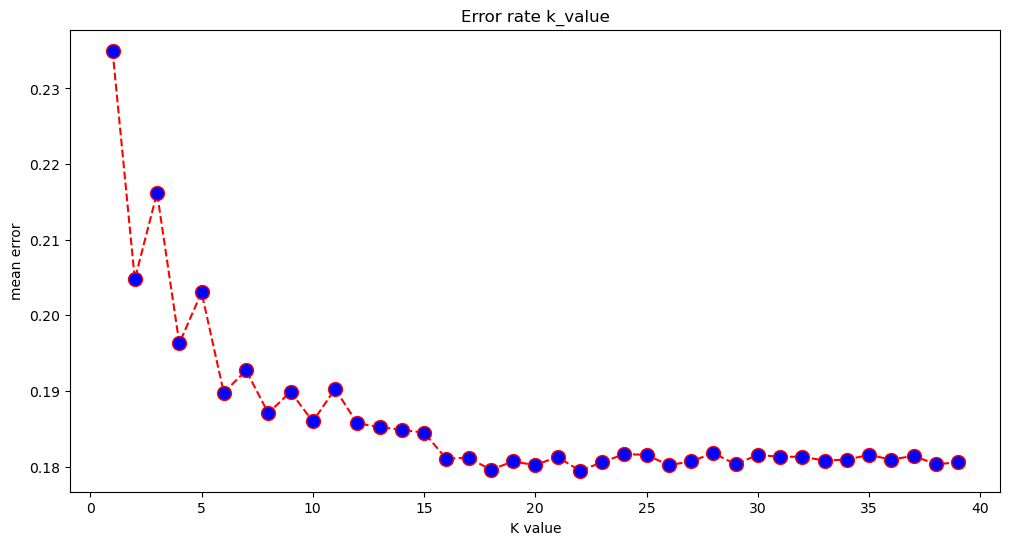

In [15]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title("Error rate k_value")
plt.xlabel("K value")
plt.ylabel("mean error")

In [16]:
# Training
model = KNeighborsClassifier(n_neighbors=16, metric='minkowski', p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [17]:
# Predicting for all test data
y_pred = model.predict(x_test)
print(np.concatenate((
    y_pred.reshape(len(y_pred), 1),
    y_test.to_numpy().reshape(len(y_test), 1)
), axis=1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [18]:
# Evaluating model confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(cm)
print("Accuracy of the model:{0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion matrix:
[[5887  310]
 [1164  780]]
Accuracy of the model:81.89411620194079%
